### CLEANING AND IMPORTING DATA

In [8]:
import pandas as pd

# File path
file_path = r'C:\mnt\data\Gender distribution in US.xls'

# Load the Excel file, skipping the first 4 rows and excluding columns B and C
df = pd.read_excel(file_path, skiprows=4, usecols=lambda column: column not in ['B', 'C'])

# Display the first few rows of the dataframe to verify the import
print(df.head())



  observation_date  Population Men (thousands of person)  \
0       2018-01-01                             133112.50   
1       2019-01-01                             133545.50   
2       2019-07-01                             134097.67   
3       2020-01-01                             134159.67   
4       2020-07-01                             134654.00   

   Population Women (thousands of person)  Gender Population (Male Percentage)  
0                               124678.17                             0.516359  
1                               125081.33                             0.516364  
2                               125625.67                             0.516310  
3                               125679.30                             0.516319  
4                               126164.00                             0.516276  


In [10]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_excel('C:/mnt/data/Gender distribution in US.xls', skiprows=4)

# Drop the "Population Men" and "Population Women" columns
df = df.drop(columns=["Population Men (thousands of person)", "Population Women (thousands of person)"])

# Display the updated DataFrame to verify the removal of the columns
print(df.head())


  observation_date  Gender Population (Male Percentage)
0       2018-01-01                             0.516359
1       2019-01-01                             0.516364
2       2019-07-01                             0.516310
3       2020-01-01                             0.516319
4       2020-07-01                             0.516276


In [12]:
import pandas as pd

# File paths
file_paths = {
    'mobile_payment_adoption': '/mnt/data/mobile payment adoption rate.xlsx',
    'working_age_population': '/mnt/data/Working age population.xls',
    'gender_distribution': '/mnt/data/Gender distribution in US.xls',
    'employment_rate': '/mnt/data/Employment rate US.xls',
    'personal_income': '/mnt/data/Personal Income US.xlsx'
}
# Load and clean each file
dataframes = {}
for name, path in file_paths.items():
    # Load the data, skipping the first 5 rows
    if path.endswith('.xls'):
        df = pd.read_excel(path, engine='xlrd', skiprows=4)
    else:
        df = pd.read_excel(path, engine='openpyxl', skiprows=4)
    
    # Drop the unnecessary columns
    df.dropna(axis=1, how='all', inplace=True)
    
    # Rename columns based on file name
    if name == 'mobile_payment_adoption':
        df.columns = ['Date', 'Adoption_Rate']
    elif name == 'working_age_population':
        df.columns = ['Date', 'Working_Age_Population']
    elif name == 'gender_distribution':
        df.columns = ['Date', 'Male_Population', 'Female_Population', 'Gender_Population_Male_Percentage']
        
        # Remove "Population Men" and "Population Women" columns
        df = df.drop(columns=["Male_Population", "Female_Population"])
        
    elif name == 'employment_rate':
        df.columns = ['Date', 'Employment_Rate']
    elif name == 'personal_income':
        df.columns = ['Date', 'Personal_Income']
    
    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Drop rows where 'Date' could not be parsed
    df = df.dropna(subset=['Date'])
    
    # Store the cleaned dataframe
    dataframes[name] = df
    
    # Display the cleaned data
    print(f"Cleaned data from {name}:")
    print(df.head(), "\n")

# Access individual dataframes
mobile_payment_adoption = dataframes['mobile_payment_adoption']
working_age_population = dataframes['working_age_population']
gender_distribution = dataframes['gender_distribution']
employment_rate = dataframes['employment_rate']
personal_income = dataframes['personal_income']

# Now, you can use these DataFrames for further analysis.

Cleaned data from mobile_payment_adoption:
        Date  Adoption_Rate
0 2018-01-01           0.20
1 2019-01-01           0.19
2 2019-07-01           0.18
3 2020-01-01           0.16
4 2020-07-01           0.16 

Cleaned data from working_age_population:
        Date  Working_Age_Population
0 2018-01-01               206563175
1 2019-01-01               206328450
2 2019-07-01               206286700
3 2020-01-01               205419350
4 2020-07-01               206120100 

Cleaned data from gender_distribution:
        Date  Gender_Population_Male_Percentage
0 2018-01-01                           0.516359
1 2019-01-01                           0.516364
2 2019-07-01                           0.516310
3 2020-01-01                           0.516319
4 2020-07-01                           0.516276 

Cleaned data from employment_rate:
        Date  Employment_Rate
0 2018-01-01          0.70713
1 2019-01-01          0.71114
2 2019-07-01          0.71583
3 2020-01-01          0.66880
4 2020-

### DESCRIPTIVE STATISTICS

In [14]:
import pandas as pd

# Rename 'Date' column to 'observation_date' in all dataframes
mobile_payment_adoption.rename(columns={'Date': 'observation_date'}, inplace=True)
working_age_population.rename(columns={'Date': 'observation_date'}, inplace=True)
gender_distribution.rename(columns={'Date': 'observation_date'}, inplace=True)
employment_rate.rename(columns={'Date': 'observation_date'}, inplace=True)
personal_income.rename(columns={'Date': 'observation_date'}, inplace=True)

# Merge all dataframes on 'observation_date'
merged_df = pd.merge(mobile_payment_adoption, working_age_population, on='observation_date')
merged_df = pd.merge(merged_df, gender_distribution, on='observation_date')
merged_df = pd.merge(merged_df, employment_rate, on='observation_date')
merged_df = pd.merge(merged_df, personal_income, on='observation_date')

print(merged_df.head())

  observation_date  Adoption_Rate  Working_Age_Population  \
0       2018-01-01           0.20               206563175   
1       2019-01-01           0.19               206328450   
2       2019-07-01           0.18               206286700   
3       2020-01-01           0.16               205419350   
4       2020-07-01           0.16               206120100   

   Gender_Population_Male_Percentage  Employment_Rate  Personal_Income  
0                           0.516359          0.70713         14259.68  
1                           0.516364          0.71114         14630.60  
2                           0.516310          0.71583         14761.10  
3                           0.516319          0.66880         14508.15  
4                           0.516276          0.67137         14927.25  


In [16]:
print(merged_df.info())
print(merged_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   observation_date                   18 non-null     datetime64[ns]
 1   Adoption_Rate                      18 non-null     float64       
 2   Working_Age_Population             18 non-null     int64         
 3   Gender_Population_Male_Percentage  18 non-null     float64       
 4   Employment_Rate                    18 non-null     float64       
 5   Personal_Income                    18 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 996.0 bytes
None
          observation_date  Adoption_Rate  Working_Age_Population  \
count                   18      18.000000            1.800000e+01   
mean   2021-08-21 05:20:00       0.196667            2.069384e+08   
min    2018-01-01 00:00:00       0.160000   

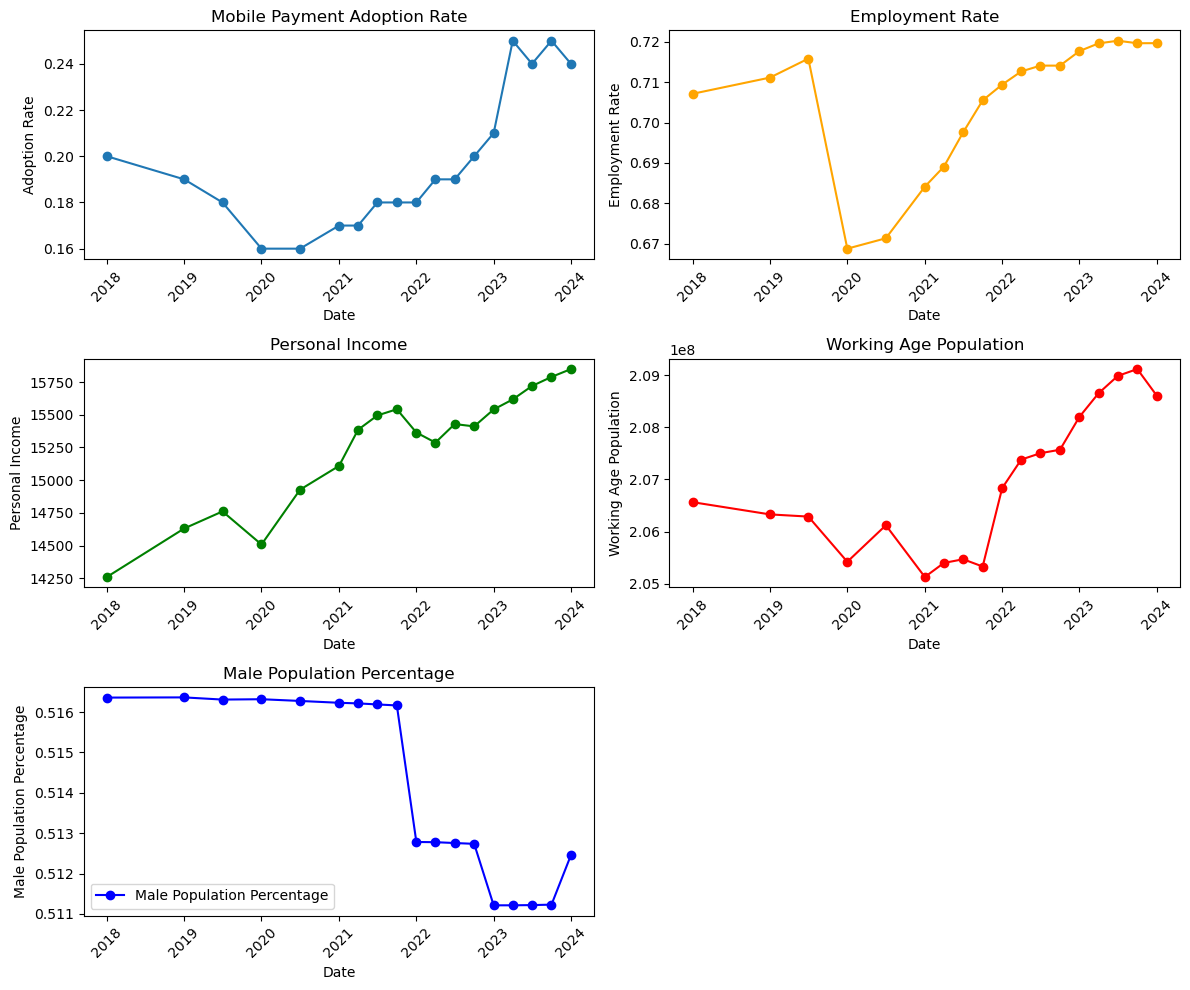

In [18]:
import matplotlib.pyplot as plt

# Convert 'observation_date' to datetime format for better plotting
merged_df['observation_date'] = pd.to_datetime(merged_df['observation_date'])

plt.figure(figsize=(12, 10))

# Plot Adoption Rate over Time
plt.subplot(3, 2, 1)
plt.plot(merged_df['observation_date'], merged_df['Adoption_Rate'], marker='o')
plt.title('Mobile Payment Adoption Rate')
plt.xlabel('Date')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)

# Plot Employment Rate over Time
plt.subplot(3, 2, 2)
plt.plot(merged_df['observation_date'], merged_df['Employment_Rate'], marker='o', color='orange')
plt.title('Employment Rate')
plt.xlabel('Date')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)

# Plot Personal Income over Time
plt.subplot(3, 2, 3)
plt.plot(merged_df['observation_date'], merged_df['Personal_Income'], marker='o', color='green')
plt.title('Personal Income')
plt.xlabel('Date')
plt.ylabel('Personal Income')
plt.xticks(rotation=45)

# Plot Working Age Population over Time
plt.subplot(3, 2, 4)
plt.plot(merged_df['observation_date'], merged_df['Working_Age_Population'], marker='o', color='red')
plt.title('Working Age Population')
plt.xlabel('Date')
plt.ylabel('Working Age Population')
plt.xticks(rotation=45)

# Plot Male vs Female Population over Time
plt.subplot(3, 2, 5)
plt.plot(merged_df['observation_date'], merged_df['Gender_Population_Male_Percentage'], marker='o', color='blue', label='Male Population Percentage')
plt.title('Male Population Percentage')
plt.xlabel('Date')
plt.ylabel('Male Population Percentage')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


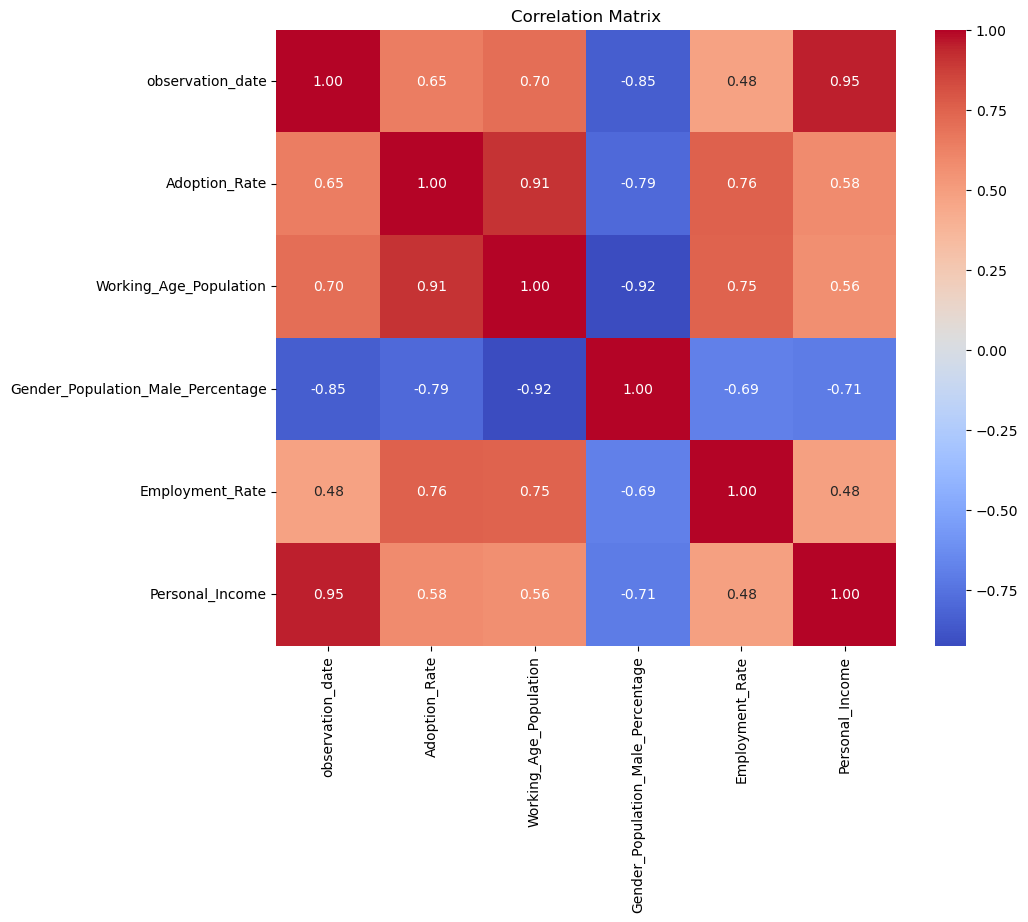

In [20]:
import seaborn as sns

# Correlation Matrix
correlation_matrix = merged_df.corr()

# Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Save the cleaned and merged dataframe
merged_df.to_csv('cleaned_merged_data.csv', index=False)

# Save visualizations
plt.figure(figsize=(12, 10))
# Add your plots here (reuse the plot code)
plt.savefig('data_visualizations.png')


<Figure size 1200x1000 with 0 Axes>

### MODEL CREATION 

In [25]:
import pandas as pd
import statsmodels.api as sm

In [27]:
# Define independent variables (X) and dependent variable (y)
X = merged_df[['Working_Age_Population', 'Gender_Population_Male_Percentage', 'Employment_Rate', 'Personal_Income']]
y = merged_df['Adoption_Rate']

# Add a constant to the model (intercept)
X = sm.add_constant(X)


In [29]:
# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Adoption_Rate   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     23.88
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           6.87e-06
Time:                        11:04:06   Log-Likelihood:                 57.369
No. Observations:                  18   AIC:                            -104.7
Df Residuals:                      13   BIC:                            -100.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

C:\Users\virat\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### MULTICOLLINEARITY CHECK

In [31]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define independent variables (X) for VIF calculation, excluding the constant
X_vif = merged_df[['Working_Age_Population', 'Gender_Population_Male_Percentage', 'Employment_Rate', 'Personal_Income']]

# Add a constant to the model (intercept)
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


                            Variable           VIF
0                              const  1.456136e+06
1             Working_Age_Population  9.235449e+00
2  Gender_Population_Male_Percentage  1.043263e+01
3                    Employment_Rate  2.323729e+00
4                    Personal_Income  2.291196e+00


### PREDICTION PERFORMANCE

In [35]:
# Example: Make predictions for new data
# Assume 'new_data' is a DataFrame containing new observations with the same columns as X (including the constant)
new_data = pd.DataFrame({
    'const': [1],  # Add a constant term
    'Working_Age_Population': [2.07e+08],
    'Gender_Population_Male_Percentage': [0.516],
    'Employment_Rate': [0.72],
    'Personal_Income': [16000]
})

# Make predictions
predictions = final_model.predict(new_data)
print("Predicted Adoption Rate:", predictions)

Predicted Adoption Rate: 0    0.230626
dtype: float64
